In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE = 256
CHANNELS = 6
BATCH_SIZE=16

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        './Roses/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=16,
        class_mode="sparse",
)

FileNotFoundError: [WinError 3] The system cannot find the path specified: './Roses/train'

In [9]:
train_generator.class_indices

{'Black Spot': 0,
 'Downy mildew': 1,
 'Fresh Leaf': 2,
 'Mosaic': 3,
 'Powdery mildew': 4,
 'Rust': 5}

In [9]:
class_names = list(train_generator.class_indices.keys())
class_names

['Black Spot',
 'Downy mildew',
 'Fresh Leaf',
 'Mosaic',
 'Powdery mildew',
 'Rust']

In [10]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.06830419 0.06830419 0.06830419]
  [0.06859357 0.06859357 0.06859357]
  [0.06888296 0.06888296 0.06888296]
  ...
  [0.04416027 0.09926115 0.06624041]
  [0.0594594  0.13251191 0.09165337]
  [0.06015893 0.14414938 0.09709056]]

 [[0.07906725 0.07906725 0.07906725]
  [0.07848846 0.07848846 0.07848846]
  [0.07790968 0.07790968 0.07790968]
  ...
  [0.04502844 0.10085279 0.06754266]
  [0.05888062 0.13236722 0.09121929]
  [0.06247405 0.14675389 0.09969507]]

 [[0.076158   0.076158   0.076158  ]
  [0.07644739 0.07644739 0.07644739]
  [0.07673679 0.07673679 0.07673679]
  ...
  [0.04589661 0.10244444 0.06884491]
  [0.05830184 0.13222253 0.0907852 ]
  [0.06478917 0.1493584  0.10229958]]

 ...

 [[0.4083542  0.49855027 0.33384436]
  [0.38705707 0.48287466 0.3181688 ]
  [0.38881645 0.48685566 0.32214975]
  ...
  [0.4694748  0.57424366 0.47620443]
  [0.46961948 0.57453305 0.4764938 ]
  [0.46976417 0.5748224  0.47678322]]

 [[0.4077754  0.49797148 0.33326557]
  [0.3861889  0.48229587 0.31759   ]


In [11]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'Roses/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=16,
        class_mode="sparse"
)

Found 682 images belonging to 6 classes.


In [12]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'Roses/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=16,
        class_mode="sparse"
)

Found 684 images belonging to 6 classes.


In [13]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.39724332 0.47821793 0.4429238 ]
  [0.39708206 0.47797602 0.4426819 ]
  [0.3969208  0.47773415 0.44244   ]
  ...
  [0.5453165  0.5886722  0.6225863 ]
  [0.5529412  0.6053008  0.6380525 ]
  [0.5515629  0.6119782  0.6486507 ]]

 [[0.38474566 0.4670986  0.43180448]
  [0.38522947 0.4675824  0.4322883 ]
  [0.38571325 0.4680662  0.43277207]
  ...
  [0.5455584  0.58915603 0.6229895 ]
  [0.5529412  0.6053814  0.6382138 ]
  [0.5514822  0.6122201  0.6489732 ]]

 [[0.38155374 0.46898982 0.43115413]
  [0.38139248 0.4686673  0.43091223]
  [0.3812312  0.46834478 0.43067035]
  ...
  [0.5458003  0.5896398  0.62339264]
  [0.5529412  0.605462   0.63837504]
  [0.5514016  0.612462   0.64929575]]

 ...

 [[0.06428471 0.06736393 0.06582432]
  [0.06750736 0.06750736 0.06750736]
  [0.06820793 0.06344733 0.06582764]
  ...
  [0.0579845  0.06190607 0.04538076]
  [0.05782324 0.06174481 0.04505823]
  [0.05766197 0.06158354 0.0447357 ]]

 [[0.06420408 0.06712203 0.06566305]
  [0.06766862 0.06766862 0.06766862]


In [14]:
#BUILDING THE MODEL 
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [21]:
5460/16

341.25

In [22]:
682/16

42.625

In [23]:
# history = model.fit(
#     train_generator,
#     steps_per_epoch=341,
#     batch_size=16,
#     validation_data=validation_generator,
#     validation_steps=42,
#     verbose=1,
#     epochs=20,
# )

Epoch 1/20
341/341 [==============================] - 237s 693ms/step - loss: 1.0655 - accuracy: 0.5542 - val_loss: 0.9604 - val_accuracy: 0.6443
Epoch 2/20
341/341 [==============================] - 214s 626ms/step - loss: 0.7073 - accuracy: 0.7019 - val_loss: 0.5647 - val_accuracy: 0.7574
Epoch 3/20
341/341 [==============================] - 213s 626ms/step - loss: 0.5973 - accuracy: 0.7482 - val_loss: 0.6726 - val_accuracy: 0.7202
Epoch 4/20
341/341 [==============================] - 212s 621ms/step - loss: 0.5402 - accuracy: 0.7803 - val_loss: 0.5318 - val_accuracy: 0.7753
Epoch 5/20
341/341 [==============================] - 211s 619ms/step - loss: 0.4582 - accuracy: 0.8216 - val_loss: 0.4196 - val_accuracy: 0.8482
Epoch 6/20
341/341 [==============================] - 212s 621ms/step - loss: 0.4076 - accuracy: 0.8519 - val_loss: 0.3552 - val_accuracy: 0.8765
Epoch 7/20
341/341 [==============================] - 212s 623ms/step - loss: 0.3599 - accuracy: 0.8701 - val_loss: 0.3636 -

In [4]:
#model.save('rose_leaf_detection.h5')

# load the saved model
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing import image

model = keras.models.load_model('rose_leaf_detection_model.h5')


In [19]:
scores = model.evaluate(test_generator)

43/43 [==============================] - 18s 399ms/step - loss: 0.1819 - accuracy: 0.9386


In [20]:
scores

[0.18188059329986572, 0.9385964870452881]

In [21]:
history

#function for inference
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence
#function for inference
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence
#run inference on few sample images
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
 

In [ ]:
history.params

In [ ]:
history.history.keys()

In [35]:
type(history.history['loss'])

list

In [36]:
len(history.history['loss'])

20

In [37]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.0654813051223755,
 0.7073193192481995,
 0.5973451733589172,
 0.5401831269264221,
 0.4582422971725464]

In [ ]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [3]:
#Run prediction on a sample image
import numpy as np

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

NameError: name 'test_generator' is not defined

In [5]:
#function for inference
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [7]:
#run inference on few sample images
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
       
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [20]:
model = keras.models.load_model('rose_leaf_detection_model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)      

In [ ]:
loss, acc = model.evaluate(test_image,test_labels)
print()

Found 0 images belonging to 0 classes.


IndexError: index 0 is out of bounds for axis 0 with size 0

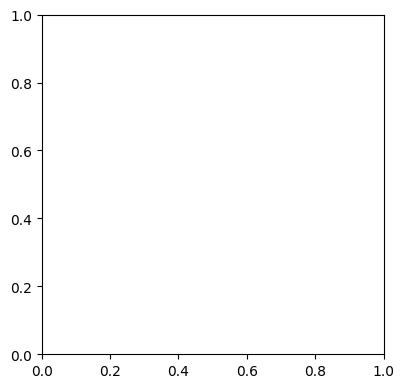

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

IMAGE_SIZE = 256
CHANNELS = 6
BATCH_SIZE=16


model = keras.models.load_model('rose_leaf_detection_model.h5')

test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        './Test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=16,
        class_mode="sparse"
)

#run inference on few sample images
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
       
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break
